# The task:
Generate 20 random variable from 1 to 100.

Draw the plot of the sequence.

Lets assume each point represent the height and so all plotting is 2d mountains.

Then consider the unlimited rain from above - cavities become lakes full of water.

Determine the deepest lake.

# The solution:
The idea is to go through the entire array and find all cavities. For each cavity we calculate the depth and then highlight the deepest lake. 

This task can be approached with the logic of finding the biggest difference between the adjacent elements:

[88 26 71 56 34 93  4 53 87 97 23 18 54 48 78 40 70 89  4 59]


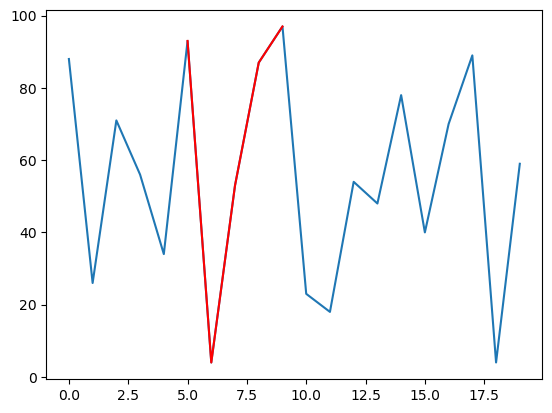

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def find_lake(terrain):
    n = len(terrain)
    
    diff = 0 # difference between points
    index = 0 # index of highest difference point
    length = 0 # length of the deepest lake
    
    for i in range(len(terrain) - 1):
        if terrain[i] - terrain[i+1] > diff:
            diff = terrain[i] - terrain[i+1] # find the difference
            index = i # remember the index
            
    for i in range(index+1, len(terrain)):
        if terrain[i] - terrain[i+1] > 0: # check if the lake found its peak 
            length = i - index 
            break

    lake = np.array(terrain[index:index+length+1]) # create the lake
    
    plt.plot(terrain) # visualize the terrain and the lake
    start_idx = np.where(np.isin(terrain, lake))[0][0]
    plt.plot(range(start_idx, start_idx+len(lake)), lake, color='red')

np.random.seed(2023)
my_arr = np.random.randint(1,100,20)
print(my_arr)
find_lake(my_arr)


But, this method is easily broken, since not every cavity with the biggest difference between adjacent points will be the deepest lake:

[ 2 51 45 52  6 33  9 36  5 27 84 68 97 43  2 52 32 94 41 11]


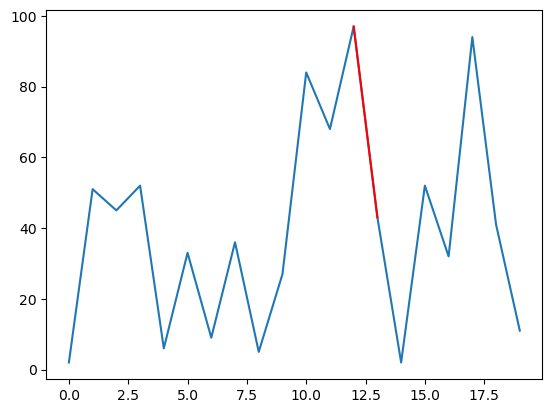

In [6]:
np.random.seed(2050)
my_arr = np.random.randint(1,100,20)
print(my_arr)
find_lake(my_arr)

We need to change the logic a little bit and also put visualization into a separate function, to improve the overall readability of code:

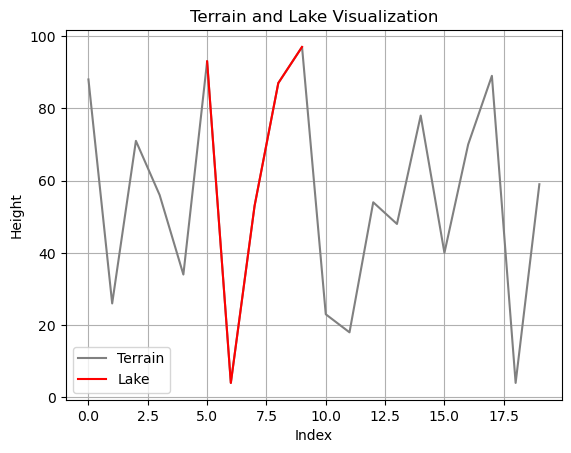

In [11]:
def find_deepest_lake(terrain):
    n = len(terrain)
    
    # this function identifies peaks which will be the boundaries for potential lakes
    def find_peaks(arr):
        peaks = []
        for i in range(1, n-1):
            if arr[i-1] < arr[i] and arr[i] > arr[i+1]: # making sure that the current element is a peak 
                peaks.append(i)
        return peaks
    
    peaks = find_peaks(terrain)
    if len(peaks) < 2:
        return None, None  # not enough peaks to form a lake

    deepest_lake_depth = 0 
    lake_start, lake_end = None, None 
    
    for i in range(len(peaks) - 1):
        left_peak = peaks[i]
        right_peak = peaks[i+1]
        lake_floor = min(terrain[left_peak:right_peak+1]) # finding the bottom of the lake
        
        possible_depth = min(terrain[left_peak], terrain[right_peak]) - lake_floor # finding the actual depth
        if possible_depth > deepest_lake_depth: # comparing the actual depth to the biggest one
            deepest_lake_depth = possible_depth
            lake_start = left_peak
            lake_end = right_peak

    return lake_start, lake_end
# this function helps us visualize the terrain and the lake
def visualize_terrain_and_lake(terrain): 
    start, end = find_deepest_lake(terrain)
    if start is None:
        print("No lake found!")
        plt.plot(terrain, label='Terrain')
    else:
        lake = terrain[start:end+1]
        plt.plot(terrain, label='Terrain', color='gray')
        plt.plot(range(start, end+1), lake, color='red', label='Lake')
    plt.title('Terrain and Lake Visualization')
    plt.xlabel('Index')
    plt.ylabel('Height')
    plt.legend()
    plt.grid(True)
    plt.show()

np.random.seed(2023)
my_arr = np.random.randint(1,100,20)
print(my_arr)
visualize_terrain_and_lake(my_arr)

Let's retest with a different dataset:

[ 2 51 45 52  6 33  9 36  5 27 84 68 97 43  2 52 32 94 41 11]


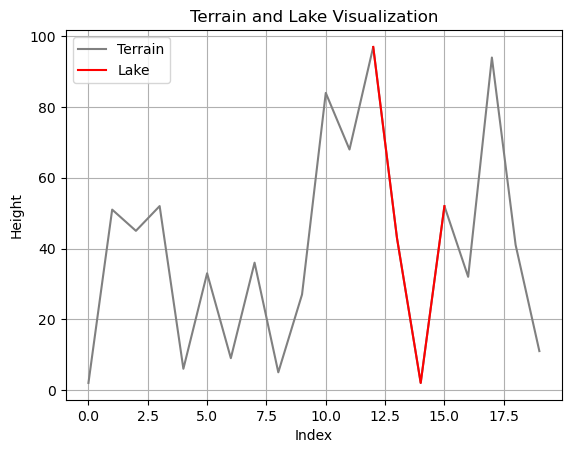

In [14]:
np.random.seed(2050)
my_arr = np.random.randint(1,100,20)
print(my_arr)
visualize_terrain_and_lake(my_arr)